In [8]:
"""From http://www.adeveloperdiary.com/data-science/how-to-visualize-gradient-descent-using-contour-plot-in-python/"""
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
x1 = np.linspace(-10.0, 10.0, 100)
x2 = np.linspace(-10.0, 10.0, 100)

X1, X2 = np.meshgrid(x1, x2)
Y = np.sqrt(np.square(X1) + np.square(X2))

cm = plt.cm.get_cmap('viridis')
# plt.scatter(X1, X2, c=Y, cmap=cm)
# plt.show()

In [14]:
proj_dir = os.path.abspath(os.getcwd() + os.sep + os.pardir) + os.sep
data_dir = os.path.join(proj_dir, "data") + os.sep
raw_dir = os.path.join(data_dir, "raw") + os.sep

In [3]:
# cp = plt.contour(X1, X2, Y)
# plt.clabel(cp, inline=1, fontsize=10)
# plt.xlabel('X1')
# plt.ylabel('X2')
# plt.show()

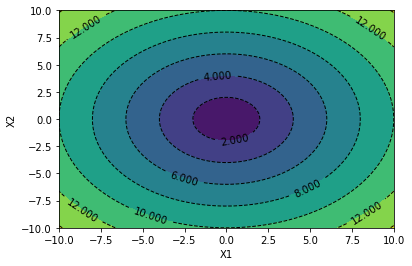

In [4]:
cp = plt.contour(X1, X2, Y, colors='black', linestyles='dashed', linewidths=1)
plt.clabel(cp, inline=1, fontsize=10)
cp = plt.contourf(X1, X2, Y, )
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [6]:
# levels = [0.0, 1.0, 2.0, 4.0, 8.0, 12.0, 14.0]
# cp = plt.contour(X1, X2, Y, levels, colors='black', linestyles='dashed', linewidths=1)
# plt.clabel(cp, inline=1, fontsize=10)
# cp = plt.contourf(X1, X2, Y, levels)
# plt.xlabel('X1')
# plt.ylabel('X2')
# plt.show()

In [26]:
target_vname = 'Temperature (C)'
data = pd.read_csv(raw_dir + "weatherHistory.csv")
data = data.drop(columns=["Apparent Temperature (C)"])
data = data.select_dtypes(np.number)
y = data[target_vname]
X = np.column_stack((data['Humidity'], data['Wind Speed (km/h)']))
 
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
def gradient_descent(W, x, y):
    y_hat = x.dot(W).flatten()
    error = (y - y_hat)
    mse = (1.0 / len(x)) * np.sum(np.square(error))
    gradient = -(1.0 / len(x)) * error.dot(x)
    return gradient, mse

In [21]:
w = np.array((-40, -40))
alpha = .1
tolerance = 1e-3
 
old_w = []
errors = []

In [27]:
# Perform Gradient Descent
iterations = 1

for i in range(200):
    gradient, error = gradient_descent(w, X_scaled, y)
    new_w = w - alpha * gradient
    
    # Print error every 10 iterations
    if iterations % 10 == 0:
        print("Iteration: %d - Error: %.4f" % (iterations, error))
        old_w.append(new_w)
        errors.append(error)
        
    # Stopping Condition
    if np.sum(abs(new_w - w)) < tolerance:
        print('Gradient Descent has converged')
        break
 
    iterations += 1
    w = new_w

print('w =', w)

Iteration: 10 - Error: 671.3102
Iteration: 20 - Error: 290.0514
Iteration: 30 - Error: 214.2760
Iteration: 40 - Error: 199.1942
Iteration: 50 - Error: 196.1909
Iteration: 60 - Error: 195.5927
Iteration: 70 - Error: 195.4736
Iteration: 80 - Error: 195.4498
Iteration: 90 - Error: 195.4451
Iteration: 100 - Error: 195.4442
Gradient Descent has converged
w = [-6.34703227 -1.34722126]


In [28]:
all_ws = np.array(old_w)
 
# Just for visualization
errors.append(600)
errors.append(500)
errors.append(400)
errors.append(300)
errors.append(225)
 
levels = np.sort(np.array(errors))

In [33]:
viz_w = 5
w0 = np.linspace(-w[0] * viz_w, w[0] * viz_w, 100)
w1 = np.linspace(-w[1] * viz_w, w[1] * viz_w, 100)
mse_vals = np.zeros(shape=(w0.size, w1.size))

In [34]:
for i, value1 in enumerate(w0):
    for j, value2 in enumerate(w1):
        w_temp = np.array((value1,value2))        
        mse_vals[i, j] = gradient_descent(w_temp, X_scaled, y)[1]

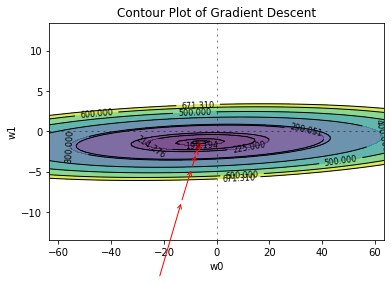

In [35]:
plt.contourf(w0, w1, mse_vals, levels,alpha=.7)
plt.axhline(0, color='black', alpha=.5, dashes=[2, 4],linewidth=1)
plt.axvline(0, color='black', alpha=0.5, dashes=[2, 4],linewidth=1)

for i in range(len(old_w) - 1):
    plt.annotate('', xy=all_ws[i + 1, :], xytext=all_ws[i, :],
                 arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                 va='center', ha='center')

CS = plt.contour(w0, w1, mse_vals, levels, linewidths=1, colors='black')
plt.clabel(CS, inline=1, fontsize=8)
plt.title("Contour Plot of Gradient Descent")
plt.xlabel("w0")
plt.ylabel("w1")
plt.show()